In [141]:
import numpy as np

import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

from IPython.display import display, clear_output

In [189]:
#https://networksciencebook.com/chapter/5#barabasi-model
#Ex1
class BA_model():
    graphM = np.zeros(shape=(0,0))
    nodes = 0
    degrees = np.zeros(shape=0)
    m = 0
    def __init__(self, m, m0):
        self.graphM = np.ones(shape = (m0,m0))
        for i in range (m0):
            self.graphM[i,i]=0
        self.nodes = m0
        self.degrees = np.ones(shape = m0)
        self.degrees*=(m0-1)
        self.m = m
        self.m0 =m0
        
    def step(self):
        self.nodes+=1
        newgraphM = np.zeros(shape=(self.nodes,self.nodes))
        newgraphM[:self.nodes-1,:self.nodes-1] = self.graphM
        self.graphM = newgraphM

        newDegrees = np.zeros(shape = self.nodes)
        newDegrees[:self.nodes-1]=self.degrees
        self.degrees=newDegrees
        

        probabilities = self.degrees/np.sum(self.degrees)
        chosenNodes = np.random.choice(len(probabilities), size =self.m,  p=probabilities , replace=False)
        for i in chosenNodes:
                self.graphM[self.nodes-1,i]=1
                self.graphM[i,self.nodes-1]=1
                self.degrees[i]+=1 
                self.degrees[self.nodes-1]+=1

    def get_edges(self):
        edges = []
        for i in range(self.nodes):
            for j in range(i+1, self.nodes):
                if self.graphM[i, j] == 1:
                    edges.append((i, j))
        return edges

    def runSimulation(self, steps):
        fig, ax = plt.subplots(figsize=(6,6))

        G_init = nx.Graph()
        G_init.add_nodes_from(range(self.nodes))
        G_init.add_edges_from(self.get_edges())
        pos = nx.spring_layout(G_init, seed=42)
        plt.pause(1)
        for step in range(steps):
            
            self.step()

            ax.clear()
            ax.set_title(f"Krok: {step+1}")

            G = nx.Graph()
            G.add_nodes_from(range(self.nodes))
            G.add_edges_from(self.get_edges())

            pos = nx.spring_layout(G, pos=pos, fixed=list(pos.keys()), seed=42)
            nx.draw(G, pos, ax=ax, node_size=self.degrees*25)

            # KLUCZ: czyścimy i wyświetlamy ponownie
            clear_output(wait=True)
            display(fig)

            plt.pause(0.2)

        plt.show()
    def run(self,steps):
        for i in range(steps):
            self.step()



    


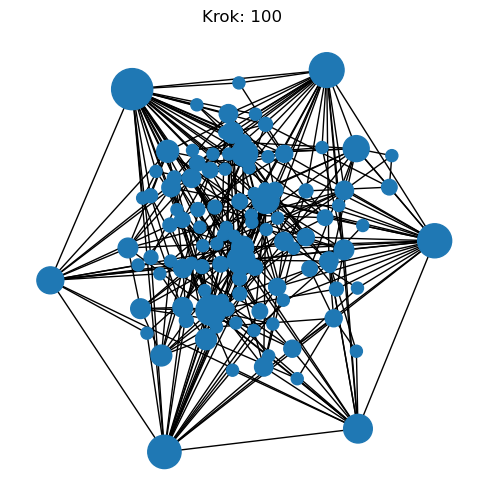

In [205]:
model = BA_model(3,7)
print('x')
model.runSimulation(100)


In [202]:
data = [[0 for _ in range(20)] for _ in range(10)]

for i in range(20):
    model =BA_model(3,7)
    for j in range (10):
        model.run(10)
        data[j][i]=model.degrees

    

In [204]:
data[0]

[array([11., 11., 10.,  9.,  6.,  9., 12.,  4.,  3.,  3.,  5.,  4.,  3.,
         3.,  3.,  3.,  3.]),
 array([ 7.,  9.,  9.,  8., 12., 12.,  9.,  4.,  5.,  5.,  3.,  3.,  3.,
         4.,  3.,  3.,  3.]),
 array([11., 11.,  6., 10.,  9.,  8., 12.,  5.,  5.,  3.,  3.,  3.,  4.,
         3.,  3.,  3.,  3.]),
 array([ 9.,  9., 10.,  9., 10., 10.,  7.,  6.,  6.,  4.,  3.,  4.,  3.,
         3.,  3.,  3.,  3.]),
 array([11.,  9.,  8.,  9.,  9., 10.,  8.,  6.,  7.,  4.,  3.,  3.,  3.,
         3.,  3.,  3.,  3.]),
 array([11.,  9., 12.,  8.,  8.,  7.,  9.,  6.,  3.,  3.,  4.,  4.,  5.,
         4.,  3.,  3.,  3.]),
 array([ 9., 11., 10.,  9.,  8., 10., 11.,  4.,  4.,  3.,  3.,  3.,  4.,
         3.,  4.,  3.,  3.]),
 array([ 9., 11.,  9.,  7.,  7., 11.,  9.,  6.,  5.,  4.,  5.,  3.,  3.,
         3.,  3.,  4.,  3.]),
 array([11.,  8.,  8., 10.,  7., 10.,  7.,  7.,  5.,  5.,  3.,  5.,  4.,
         3.,  3.,  3.,  3.]),
 array([11.,  8., 11., 10.,  9., 10.,  8.,  4.,  4.,  3.,  3.,  5.,  3.,


In [211]:
maxDegree = int(np.max([deg.max() for deg in data[0]]))
minDegree = int(np.min([deg.min() for deg in data[0]]))


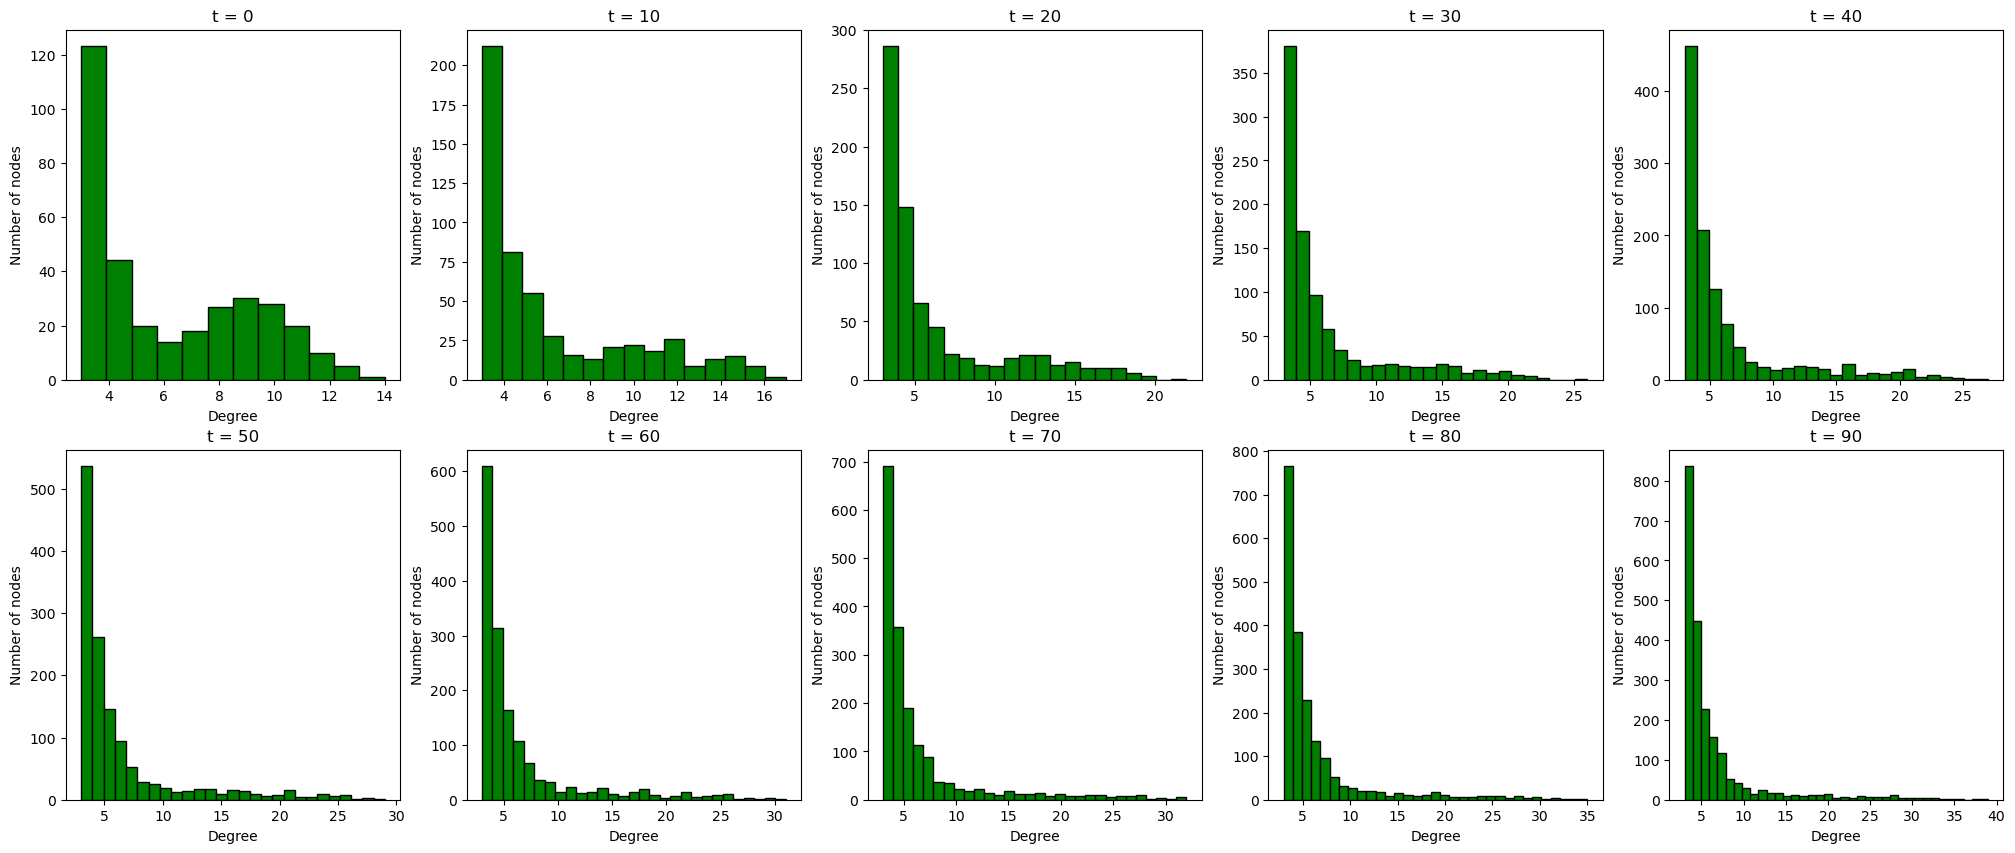

In [228]:
fig, axes = plt.subplots(2, 5, figsize=(25, 10)) 
axes = axes.flatten()

for i in range(10):
    maxDegree = int(np.max([deg.max() for deg in data[i]]))
    minDegree = int(np.min([deg.min() for deg in data[i]]))

    axes[i].hist(np.array(data[i]).flatten(), bins=maxDegree-minDegree+1, range=(minDegree, maxDegree), color='green', edgecolor='black')
    axes[i].set_title(f"t = {10*i}")
    axes[i].set_xlabel("Degree")
    axes[i].set_ylabel("Number of nodes")

plt.show()

In [289]:
for i in range(10):
    print(np.array(data[i]).shape)

(20, 17)
(20, 27)
(20, 37)
(20, 47)
(20, 57)
(20, 67)
(20, 77)
(20, 87)
(20, 97)
(20, 107)


In [366]:
for i in range (10):
    k = np.max(np.array(data[i]).flatten())
    d = np.array(data[i]).flatten()
    results = []
    for i in range (int(k)):
        sum=0
        for j in range(i+1):
            sum+=np.sum(d[d==j])
        results.append(sum)
    results = results/np.sum(d)

    kVals = np.arange(1, len(results)+1)
    piK = np.log(results[4:] )
    kVals =  np.log(kVals[4:])
    
    coeff = np.polyfit(kVals, piK, 1)
    slope = coeff[0]  
    alpha = slope - 1  

    print(alpha)




    



0.41734674334271804
-0.03535943509617623
-0.24383276954565736
-0.33784964083164903
-0.3952926012712157
-0.44652300261242006
-0.4776726948703979
-0.5038522585174106
-0.5309893476983407
-0.5597191081170299
